#importing Of Libraries

In [13]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Downloading NLTK Packages

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Loading Dataset Of Election Parties Seperately

In [15]:
modi = pd.read_csv("/content/modi_reviews.csv")
rahul = pd.read_csv('/content/rahul_reviews.csv')

Printing the first 3 rows and columns of modi dataset

In [16]:
modi.head(3)

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...


Printing the first 3 rows and columns of rahul datset

In [17]:
rahul.head(3)

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...


#Total Rows and Columns

In [18]:
modi.shape

(25688, 3)

In [19]:
rahul.shape

(14261, 3)

displaying 10 to 20 row dataset of modi dataset

In [20]:
modi['Tweet'][10:20]

10    #BJP was renamed as Safroon Party then again i...
11    All Pakistanis had serious doubts on concept o...
12    @ajaymaken @RahulGandhi And as a final touch, ...
13    I think before casting the vote for  last phas...
14    Trying to forge opposition will be a futile ex...
15    #LokSabhaElections2019 Anyone not having mass ...
16    #ElectionCommission #LokSabhaElections2019 PM'...
17    @INCIndia should release a video of @RahulGand...
18    @KajalChauhan_ @dashingassu Our PM ( Modi ji) ...
19    Howmany Seats will BJP win ?\n\n#LokSabhaElect...
Name: Tweet, dtype: object

displaying 10 to 20 row dataset of rahul dataset

In [21]:
rahul['Tweet'][10:20]

10    @IYCTelangana @IncBasavakalyan @narendramodi @...
11    @ani_digital @ANI @rssurjewala IF #ECI #SunilA...
12    My Predictions\n\nBJP+NDA = 300 to 310\nCongre...
13    Siddaramaiah, Mallikarjun Kharge, Dinesh Gundu...
14    @RahulGandhi RG Next PM of india #LokSabhaElec...
15        @RahulGandhi Great One #LokSabhaElections2019
16    @RahulGandhi We should not speak about Nehru, ...
17    Whatever the outcome of #LokSabhaElections2019...
18    @JhaSanjay nice pic @JhaSanjay ...\nu totally ...
19    #BJP's aircraft had been detected by #Congress...
Name: Tweet, dtype: object

#prdiction Of the Sentiments

In [22]:
TextBlob(modi['Tweet'][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [23]:
TextBlob(rahul['Tweet'][0]).sentiment

Sentiment(polarity=0.21875, subjectivity=0.4017857142857143)

# Apply text preprocessing to Modi data
Here we have performed

1) Handling of Missing value and check wheither value is present there or not

2) Covert colums into the strings

3) Removel of special character, emoji and stopwords

4) Stemming

5) Removel of numeric value

In [24]:
def preprocess_modi_text_data(data, text_column_name):
    data[text_column_name] = data[text_column_name].str.lower()

    print(f"Data type of '{text_column_name}' before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])
    data.loc[:, text_column_name] = data[text_column_name].astype(str)
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
    stemmer = PorterStemmer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))
    return data

modi = preprocess_modi_text_data(modi, 'Tweet')
modi_data = modi.drop('Unnamed: 0', axis=1)
modi_data.head()

Data type of 'Tweet' before handling missing values: object
Number of missing values in 'Tweet' before handling missing values: 5


,User,Tweet
0,advosushildixit,anjanaomkashyap see futur bjp spokesperson goo...
1,jiaeur,loksabhaelect rd may reveal even ecisveep coul...
2,PVenkatGandhi,loksabhaelect rd may reveal even ecisveep coul...
3,TheNirbhay1,pm modi creat new record pm democrat countri c...
4,ShakeChilli,abhijitmajumd appoint successor god forbid all...


# Apply text preprocessing to Rahul data
Here we have performed

1) Handling of Missing value and check wheither value is present there or not

2) Covert colums into the strings

3) Removel of special character, emoji and stopwords

4) Stemming

5) Removel of numeric value

In [25]:
def preprocess_rahul_text_data(data, text_column_name):
    data[text_column_name] = data[text_column_name].str.lower()

    print(f"Data type of '{text_column_name}' before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])
    data.loc[:, text_column_name] = data[text_column_name].astype(str)
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
    stemmer = PorterStemmer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))
    return data

rahul = preprocess_rahul_text_data(rahul, 'Tweet')
rahul_data = rahul.drop('Unnamed: 0', axis=1)
rahul_data.head()

Data type of 'Tweet' before handling missing values: object
Number of missing values in 'Tweet' before handling missing values: 0


,User,Tweet
0,Sunnysweet16,wonder academ journalist ask inc india rahul g...
1,drnitinchaube,congrat chang australiavot scottmorrison sir w...
2,mrvivek07,peopel say govt ne year kya kiya uns pucho yea...
3,JosephPravinP,ajaymaken rahulgandhi final touch modi ji prov...
4,VandanaMegastar,loksabhaelect anyon mass back cant visionari p...


Defining of the function

In [26]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

#Applying Polarity

In [27]:
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
rahul['Polarity'] = rahul['Tweet'].apply(find_polarity)

#checking polarization of Modi and Rahul with first 5 values

In [28]:
modi.head(5)

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,anjanaomkashyap see futur bjp spokesperson goo...,0.193750
1,1,jiaeur,loksabhaelect rd may reveal even ecisveep coul...,0.800000
2,2,PVenkatGandhi,loksabhaelect rd may reveal even ecisveep coul...,0.800000
3,3,TheNirbhay1,pm modi creat new record pm democrat countri c...,0.578788
4,4,ShakeChilli,abhijitmajumd appoint successor god forbid all...,0.274091


In [29]:
rahul.head(5)

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,wonder academ journalist ask inc india rahul g...,0.000000
1,1,drnitinchaube,congrat chang australiavot scottmorrison sir w...,0.000000
2,2,mrvivek07,peopel say govt ne year kya kiya uns pucho yea...,0.000000
3,3,JosephPravinP,ajaymaken rahulgandhi final touch modi ji prov...,0.480000
4,4,VandanaMegastar,loksabhaelect anyon mass back cant visionari p...,-0.166667


#Creating Positive and Negative Label

In [30]:
modi['Label'] = np.where(modi['Polarity']>0,'positive','negative')
modi['Label'][modi['Polarity']==0]='Neutral'

rahul['Label'] = np.where(rahul['Polarity']>0,'positive','negative')
rahul['Label'][rahul['Polarity']==0]='Neutral'

<ipython-input-30-3d0c11c30ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi['Label'][modi['Polarity']==0]='Neutral'
<ipython-input-30-3d0c11c30ff7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul['Label'][rahul['Polarity']==0]='Neutral'


#Checking Labelling of Modi and Rahul with first 5 values

In [31]:
modi.head(5)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,anjanaomkashyap see futur bjp spokesperson goo...,0.193750,positive
1,1,jiaeur,loksabhaelect rd may reveal even ecisveep coul...,0.800000,positive
2,2,PVenkatGandhi,loksabhaelect rd may reveal even ecisveep coul...,0.800000,positive
3,3,TheNirbhay1,pm modi creat new record pm democrat countri c...,0.578788,positive
4,4,ShakeChilli,abhijitmajumd appoint successor god forbid all...,0.274091,positive


In [32]:
rahul.head(5)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,wonder academ journalist ask inc india rahul g...,0.000000,Neutral
1,1,drnitinchaube,congrat chang australiavot scottmorrison sir w...,0.000000,Neutral
2,2,mrvivek07,peopel say govt ne year kya kiya uns pucho yea...,0.000000,Neutral
3,3,JosephPravinP,ajaymaken rahulgandhi final touch modi ji prov...,0.480000,positive
4,4,VandanaMegastar,loksabhaelect anyon mass back cant visionari p...,-0.166667,negative


#Removel of neural sentiments Of Public from Rahul and Modi

In [33]:
neutral_modi = modi[modi['Polarity']==0.0000]
remove_neutral_modi = modi['Polarity'].isin(neutral_modi['Polarity'])
modi.drop(modi[remove_neutral_modi].index,inplace=True)
print(neutral_modi.shape)
print(modi.shape)

(9702, 5)
(15981, 5)


In [34]:
neutral_rahul = rahul[rahul['Polarity']==0.0000]
remove_neutral_rahul = rahul['Polarity'].isin(neutral_rahul['Polarity'])
rahul.drop(rahul[remove_neutral_rahul].index,inplace=True)
print(neutral_rahul.shape)
print(rahul.shape)

(5849, 5)
(8412, 5)


#filter both are Equal to analyis

In [35]:
np.random.seed(10)
remove_n = 7981
drop_indices = np.random.choice(modi.index,remove_n,replace=False)
df_modi = modi.drop(drop_indices)

In [36]:
np.random.seed(10)
remove_n = 412
drop_indices1 = np.random.choice(rahul.index,remove_n,replace=False)
df_rahul = rahul.drop(drop_indices1)

#printing Shape of Modi and Rahul

In [37]:
print(df_modi.shape)
print(df_rahul.shape)

(8000, 5)
(8000, 5)


#prediction Of The Poll Result

In [38]:
modi_count=df_modi.groupby('Label').count()

In [39]:
modi_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
negative,1992,1992,1992,1992
positive,6008,6008,6008,6008


In [40]:
modi_count['Polarity']

Label
negative    1992
positive    6008
Name: Polarity, dtype: int64

In [41]:
negative_modi = (modi_count['Polarity'][0] / 8000) * 100
positive_modi = (modi_count['Polarity'][1] / 8000) * 100

In [42]:
rahul_count=df_rahul.groupby('Label').count()

In [43]:
rahul_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
negative,2456,2456,2456,2456
positive,5544,5544,5544,5544


In [44]:
rahul_count['Polarity']

Label
negative    2456
positive    5544
Name: Polarity, dtype: int64

In [45]:
negative_rahul = (rahul_count['Polarity'][0] / 8000) * 100
positive_rahul = (rahul_count['Polarity'][1] / 8000) * 100

In [46]:
politicians = ['Modi','Rahul']

negative_list = [negative_modi,negative_rahul]
positive_list = [positive_modi,positive_rahul]


fig = go.Figure(
data = [
    go.Bar(name='Negative',x=politicians,y=negative_list),
    go.Bar(name='Positive',x=politicians,y=positive_list)
]
)
fig.update_layout(barmode='group')
fig.show()

In [47]:
total_neg_modi = negative_modi
total_pos_modi = positive_modi
total_neg_rahul = negative_rahul
total_pos_rahul = positive_rahul

In [48]:
if total_pos_modi > total_pos_rahul and total_neg_modi < total_neg_rahul:
    print("Modi party has more chance of winning election")
else :
    print("Rahul party has more chance of winning election")

Modi party has more chance of winning election


##Adding of WorldCloud

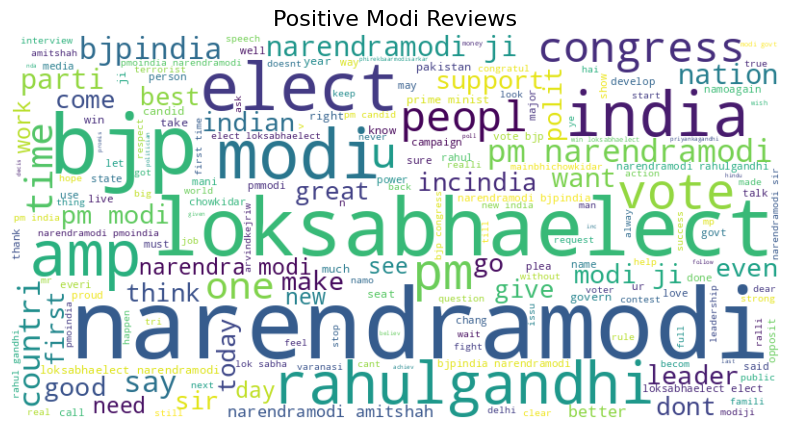

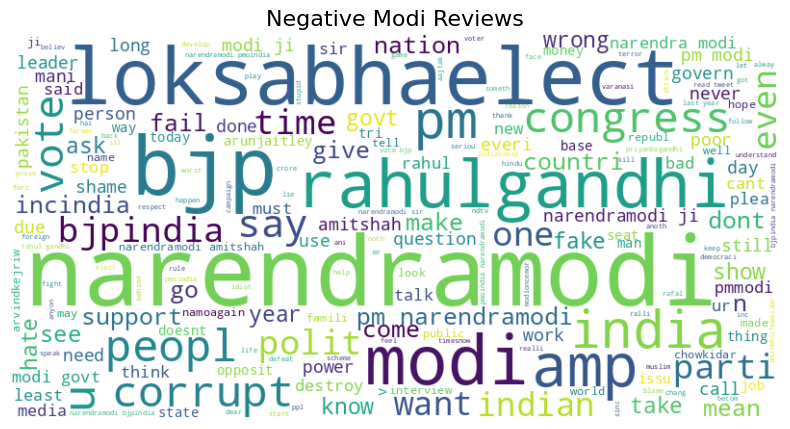

In [49]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

positive_modi_reviews = df_modi[df_modi['Label'] == 'positive']['Tweet']
negative_modi_reviews = df_modi[df_modi['Label'] == 'negative']['Tweet']
positive_modi_text = ' '.join(positive_modi_reviews)
negative_modi_text = ' '.join(negative_modi_reviews)
generate_word_cloud(positive_modi_text, 'Positive Modi Reviews')
generate_word_cloud(negative_modi_text, 'Negative Modi Reviews')


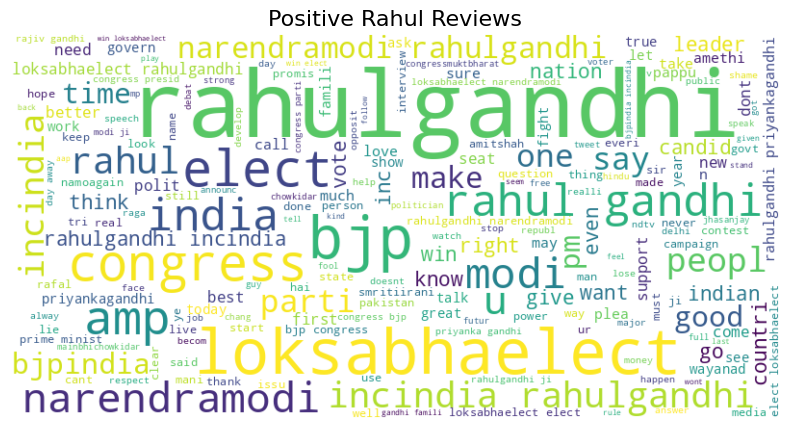

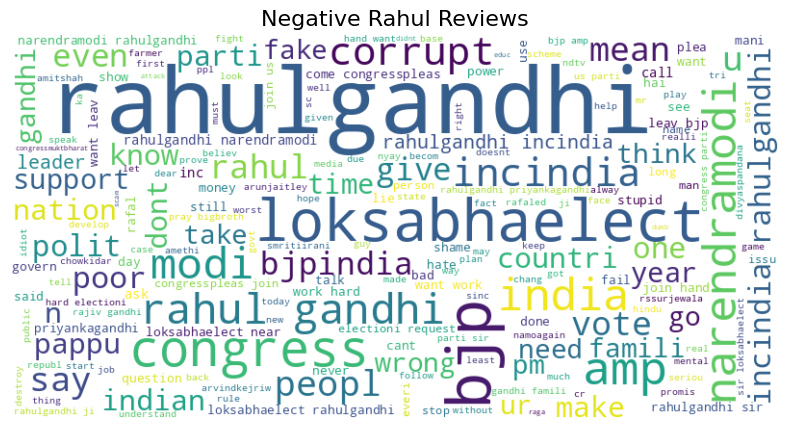

In [50]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

positive_rahul_reviews = df_rahul[df_rahul['Label'] == 'positive']['Tweet']
negative_rahul_reviews = df_rahul[df_rahul['Label'] == 'negative']['Tweet']
positive_rahul_text = ' '.join(positive_rahul_reviews)
negative_rahul_text = ' '.join(negative_rahul_reviews)
generate_word_cloud(positive_rahul_text, 'Positive Rahul Reviews')
generate_word_cloud(negative_rahul_text, 'Negative Rahul Reviews')

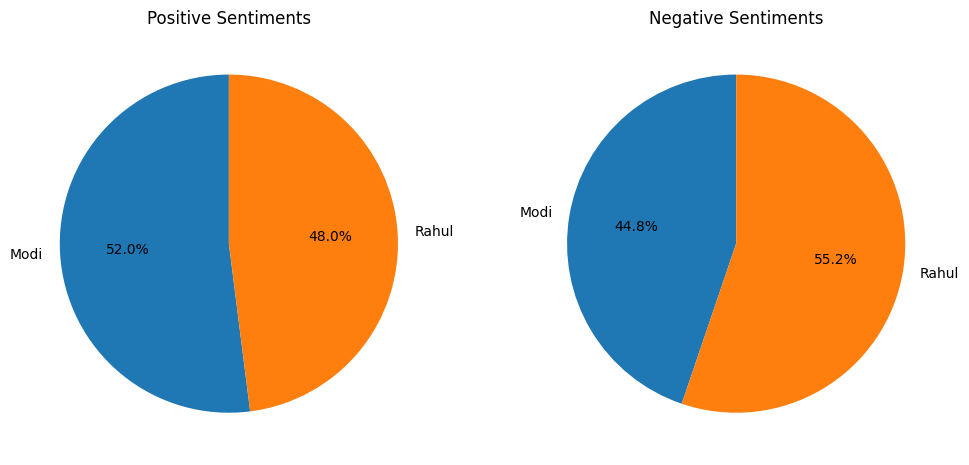

In [51]:
politicians = ['Modi', 'Rahul']
positive_sentiments = [positive_modi, positive_rahul]
negative_sentiments = [negative_modi, negative_rahul]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(positive_sentiments, labels=politicians, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Positive Sentiments')
axs[1].pie(negative_sentiments, labels=politicians, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Negative Sentiments')
plt.show()

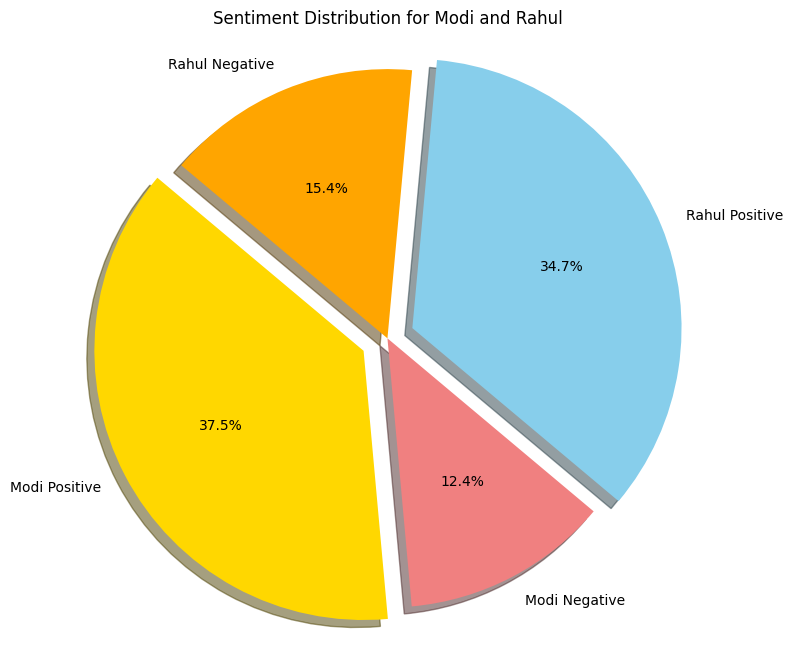

In [52]:
import matplotlib.pyplot as plt
labels = ['Modi Positive', 'Modi Negative', 'Rahul Positive', 'Rahul Negative']
sizes = [total_pos_modi, total_neg_modi, total_pos_rahul, total_neg_rahul]
colors = ['gold', 'lightcoral', 'skyblue', 'orange']
explode = (0.1, 0, 0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution for Modi and Rahul')
plt.show()


#to increase accuracy of model i have use random forest

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#import joblib

combining modi and rahul dataset

In [54]:
combined_data = pd.concat([df_modi, df_rahul], ignore_index=True)

converting text data in vectorized form

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(combined_data['Tweet'])
y = combined_data['Label']
#joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

splitting of data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trainning of model and prediction of model

In [57]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
#joblib.dump(rf_classifier, 'random_forest_model.pkl')
y_pred = rf_classifier.predict(X_test)

In [58]:
y_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

Accuracy of model

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9284375


Full Classification detail of Model

In [60]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.82      0.87       905
    positive       0.93      0.97      0.95      2295

    accuracy                           0.93      3200
   macro avg       0.92      0.90      0.91      3200
weighted avg       0.93      0.93      0.93      3200



prediction of model

In [61]:
modi_positive_percentage = total_pos_modi / (total_pos_modi + total_neg_modi)
rahul_positive_percentage = total_pos_rahul / (total_pos_rahul + total_neg_rahul)
if modi_positive_percentage > rahul_positive_percentage:
    election_winner = 'Modi'
else:
    election_winner = 'Rahul'

print(f"Predicted Result from Sentiment Analysis is: {election_winner}")


Predicted Result from Sentiment Analysis is: Modi


In [62]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [63]:
# Import necessary libraries
'''import joblib
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from IPython.display import display, clear_output
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

# Load the TF-IDF vectorizer and the trained random forest classifier
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
classifier = joblib.load('random_forest_model.pkl')

# Create GUI elements
text_input = widgets.Textarea(
    placeholder='Enter your text here...',
    description='Text:',
    layout={'height': '100px'}
)

submit_button = widgets.Button(description='Submit')
output = widgets.Output()

# Display GUI elements
display(text_input, submit_button, output)

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)])
    text = re.sub(r'\d+', '', text)
    return text

# Define event handler for the submit button
def on_submit_button_clicked(b):
    text = text_input.value.lower().strip()
    # Preprocess the text using the tfidf vectorizer
    text_vectorized = tfidf_vectorizer.transform([preprocess_text(text)])
    # Use the loaded classifier to make a prediction
    prediction = classifier.predict(text_vectorized)[0]
    with output:
        output.clear_output()
        print(f"The text is likely for: {prediction}")

# Register event handler
submit_button.on_click(on_submit_button_clicked)'''


'import joblib\nimport re\nimport numpy as np\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.ensemble import RandomForestClassifier\nimport ipywidgets as widgets\nfrom IPython.display import display, clear_output\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nfrom nltk.stem import PorterStemmer\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\n\n# Load the TF-IDF vectorizer and the trained random forest classifier\ntfidf_vectorizer = joblib.load(\'tfidf_vectorizer.pkl\')\nclassifier = joblib.load(\'random_forest_model.pkl\')\n\n# Create GUI elements\ntext_input = widgets.Textarea(\n    placeholder=\'Enter your text here...\',\n    description=\'Text:\',\n    layout={\'height\': \'100px\'}\n)\n\nsubmit_button = widgets.Button(description=\'Submit\')\noutput = widgets.Output()\n\n# Display GUI elements\ndisplay(text_input, submit_button, output)\n\n# Define preprocessing function\ndef preprocess_text(text):\n  

Textarea(value='', placeholder='Enter text...')

Button(description='Predict Sentiment', style=ButtonStyle())

Label(value='')

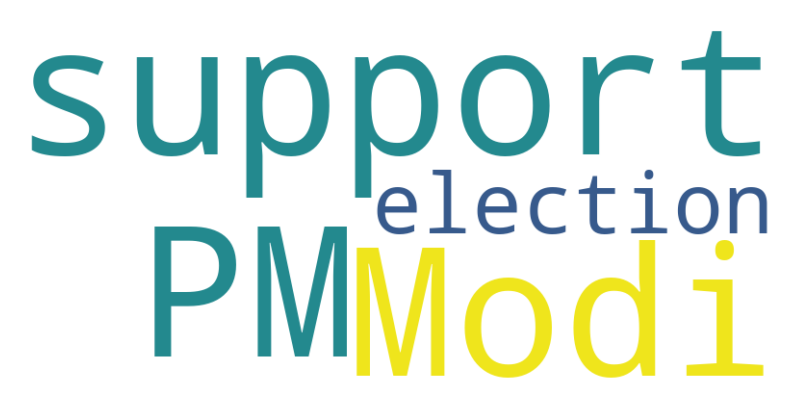

In [64]:
import ipywidgets as widgets
from IPython.display import display
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s😀-🙁]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)])
    text = re.sub(r'\d+', '', text)
    return text

def predict_sentiment(input_text):
    input_text = preprocess_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([input_text])
    prediction = rf_classifier.predict(input_vectorized)[0]
    return prediction

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def on_button_click(b):
    input_text = text_input.value
    prediction = predict_sentiment(input_text)
    output_label.value = f'Sentiment: {prediction}'
    plot_wordcloud(input_text)

text_input = widgets.Textarea(placeholder='Enter text...')
predict_button = widgets.Button(description='Predict Sentiment')
output_label = widgets.Label()

predict_button.on_click(on_button_click)

display(text_input)
display(predict_button)
display(output_label)
